In [14]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns             
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

In [16]:
df = pd.read_csv('./task-4_heart.csv', sep=',')
print('Размер выборки:', df.shape) 
df.head( 10) 

Размер выборки: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [17]:
# Сделали OHE для категориальной переменной
df_categor = pd.get_dummies(df[['sex','cp','fbs','restecg','exang','slope','ca','thal']],columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'], drop_first=True)
# Объединили назад наши таблички
df = pd.concat([df.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal'],axis=1),df_categor], axis=1)
df=df.astype('float')
df.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52.0,125.0,212.0,168.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,53.0,140.0,203.0,155.0,3.1,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,70.0,145.0,174.0,125.0,2.6,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61.0,148.0,203.0,161.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62.0,138.0,294.0,106.0,1.9,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
df_train, df_test = train_test_split(df, test_size = 0.3)
# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(df_train[['age','trestbps','chol','thalach','oldpeak']]) 
# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(df_train[['age','trestbps','chol','thalach','oldpeak']])

# Применяем скалирвощик к тесту 
df_test_scale = scaler.transform(df_test[['age','trestbps','chol','thalach','oldpeak']])
# Заменяем значения на отскалированные
df_train[['age','trestbps','chol','thalach','oldpeak']] = df_train_scale
df_test[['age','trestbps','chol','thalach','oldpeak']] = df_test_scale

In [19]:
y_train = df_train.target 
y_test = df_test.target 

X_train = df_train.drop('target', axis=1)
X_test = df_test.drop('target', axis=1)

In [20]:
def classifier(clf,X_tr,y_tr,X_tst,y_tst):
  clf.fit(X_tr, y_tr)
  y_pred = clf.predict(X_tst)
  print('Accuracy:',(accuracy_score(y_tst,y_pred)))
  confusion_matrix1 = confusion_matrix(y_tst, y_pred)
  print('Confusion matrix\n',confusion_matrix1)
  print(classification_report(y_tst, y_pred))


In [21]:
print('LogisticRegression\n')
classifier(LogisticRegression(),X_train,y_train,X_test,y_test)
print('SVM\n')
classifier(SVC(kernel='linear', C=0.5),X_train,y_train,X_test,y_test)
print('KNN\n')
classifier(KNeighborsClassifier(n_neighbors=5),X_train,y_train,X_test,y_test)

LogisticRegression

Accuracy: 0.8993506493506493
Confusion matrix
 [[129  19]
 [ 12 148]]
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       148
         1.0       0.89      0.93      0.91       160

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308

SVM

Accuracy: 0.8961038961038961
Confusion matrix
 [[127  21]
 [ 11 149]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       148
         1.0       0.88      0.93      0.90       160

    accuracy                           0.90       308
   macro avg       0.90      0.89      0.90       308
weighted avg       0.90      0.90      0.90       308

KNN

Accuracy: 0.8441558441558441
Confusion matrix
 [[125  23]
 [ 25 135]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       1

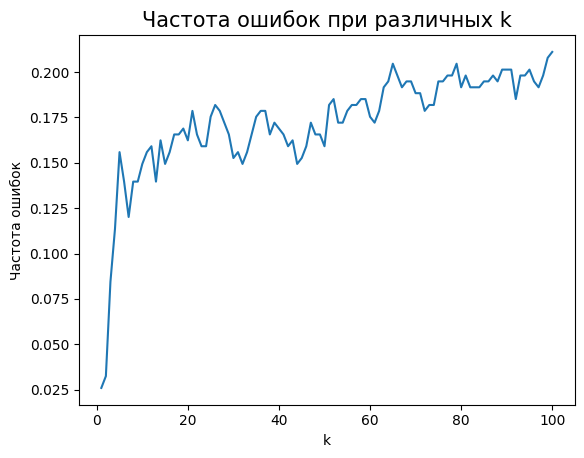

In [22]:
errors=[]
for i in range(1,101):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train, y_train)
     y_pred = knn.predict(X_test)
     errors.append(np.mean(y_pred != y_test))

plt.xlabel('k', size=10)
plt.ylabel('Частота ошибок',size=10)
plt.title('Частота ошибок при различных k',size=15)
plt.plot(np.arange(1,101),errors)
plt.show()